<a href="https://colab.research.google.com/github/cnboker/100-Days-Of-ML-Code/blob/master/Finance_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Description This is a python program for finance
#    This program will show you how to compute portfolio returns.
#     get daily returns and volatility etc.



In [91]:
#support zh
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
!mv SimHei.ttf /usr/share/fonts/truetype/

--2021-04-03 13:33:58--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  13.1MB/s    in 0.8s    

2021-04-03 13:33:59 (13.1 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
replace chinese.simhei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: mv: cannot stat 'SimHei.ttf': No such file or directory


In [92]:
# import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/SimHei.ttf'
fontprop = fm.FontProperties(fname=path, size=13)



In [93]:
# Get the stock symbols for the portfolio
# FAANG
#stockSymbols = ['FB','AMZN', 'AAPL', 'NFLX', 'GOOG']
# stockSymbols = ['FB','AMZN', 'AAPL', 'NFLX', 'GOOG']
stockSymbols={'沃森生物':'300142.SZ','腾邦国际':'300178.SZ',
        '友阿股份':'002277.SZ','骆驼股份':'601311.SS',
        '掌阅科技':'603533.SS'}
stockCodes =list(stockSymbols.values())
stockNames =list(stockSymbols.keys())
print(stockCodes)
# Get the stock starting date
stockStartDate = '2013-01-01'

['300142.SZ', '300178.SZ', '002277.SZ', '601311.SS', '603533.SS']


In [94]:
# Get today date and format it in the form YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')
from datetime import datetime, timedelta
n=30
t = datetime.now()
t0 = t-timedelta(n)
start = t0.strftime('%Y-%m-%d')
end = t.strftime('%Y-%m-%d')

In [95]:
#Get the number of assets in the portfolio
numAssets = len(stockSymbols)
print('You have ' + str(numAssets) + ' assets in your portfolio ')

You have 5 assets in your portfolio 


In [107]:
#Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks=stockCodes,start=start,end=end, col='Adj Close'):
  data = web.DataReader(stocks,data_source='yahoo',start=start,end=end)[col]
  return data

#Get the stock portfolio price
my_stocks = getMyPortfolio()
#my_stocks

In [97]:
def showGraph(stocks = stockCodes,start=start,end=end,col='Adj Close'):
  title = 'Portfolio ' + col + ' Price History'

  #Get stocks
  my_stocks = getMyPortfolio(stocks=stockCodes, start=start,end=end,col=col)

  #Give figure size
  plt.figure(figsize=(14,6))

  #Loop through each stock and plot the price
  for key in stockSymbols.keys():
    plt.plot(my_stocks[stockSymbols[key]],label=key)

  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col + ' Price', fontsize=18)
  plt.legend(stockSymbols.keys(), loc='upper left',prop=fontprop)
  plt.show()



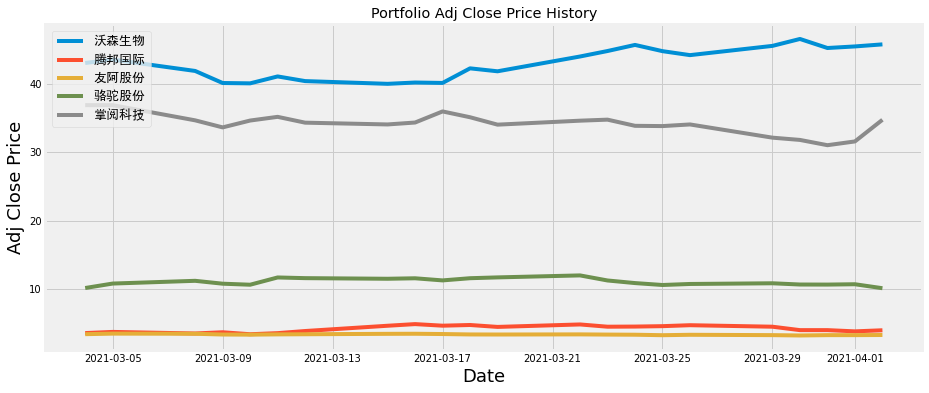

In [98]:
#Show graph
showGraph(stockCodes,start,end)

In [110]:
#Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,300142.SZ,300178.SZ,002277.SZ,601311.SS,603533.SS
Date,,,,,
2021-03-04,NaN,NaN,NaN,NaN,NaN
2021-03-05,0.011628,0.047619,0.023460,0.064039,-0.000271
2021-03-08,-0.038161,-0.061497,-0.005731,0.037037,-0.059989
2021-03-09,-0.042065,0.051282,-0.031700,-0.037500,-0.029743
2021-03-10,-0.001248,-0.078591,-0.005952,-0.013915,0.029762
2021-03-11,0.025231,0.047059,0.011976,0.099718,0.015607
2021-03-12,-0.016569,0.087079,0.005917,-0.008554,-0.024189
2021-03-15,-0.009911,0.198966,0.017647,-0.007765,-0.007582
2021-03-16,0.004755,0.051724,0.002890,0.006087,0.008228


In [111]:
#Show the stock correlation
#表示2个变量的关联强度
daily_simple_returns.corr()


Symbols,300142.SZ,300178.SZ,002277.SZ,601311.SS,603533.SS
Symbols,,,,,
300142.SZ,1.000000,-0.036174,0.014741,0.231425,0.185217
300178.SZ,-0.036174,1.000000,0.465921,0.164924,0.101104
002277.SZ,0.014741,0.465921,1.000000,0.443706,0.247391
601311.SS,0.231425,0.164924,0.443706,1.000000,-0.238939
603533.SS,0.185217,0.101104,0.247391,-0.238939,1.000000


In [112]:
#Show the covariance matrix for simmple returns
#协方差，表示2个变量的相关性
daily_simple_returns.cov()

Symbols,300142.SZ,300178.SZ,002277.SZ,601311.SS,603533.SS
Symbols,,,,,
300142.SZ,0.000668,-0.000067,0.000006,0.000226,0.000170
300178.SZ,-0.000067,0.005123,0.000482,0.000446,0.000257
002277.SZ,0.000006,0.000482,0.000209,0.000243,0.000127
601311.SS,0.000226,0.000446,0.000243,0.001428,-0.000321
603533.SS,0.000170,0.000257,0.000127,-0.000321,0.001262


In [113]:
#Show the variance
#变量方差
daily_simple_returns.var()

Symbols
300142.SZ    0.000668
300178.SZ    0.005123
002277.SZ    0.000209
601311.SS    0.001428
603533.SS    0.001262
dtype: float64

In [114]:
#Print the standard deviation for daily simple returns
#标准差数字越大表示波动越大
#the higher the volatility the higher the return
print('The stock Valatility:')
daily_simple_returns.std()


The stock Valatility:


Symbols
300142.SZ    0.025855
300178.SZ    0.071574
002277.SZ    0.014465
601311.SS    0.037793
603533.SS    0.035526
dtype: float64

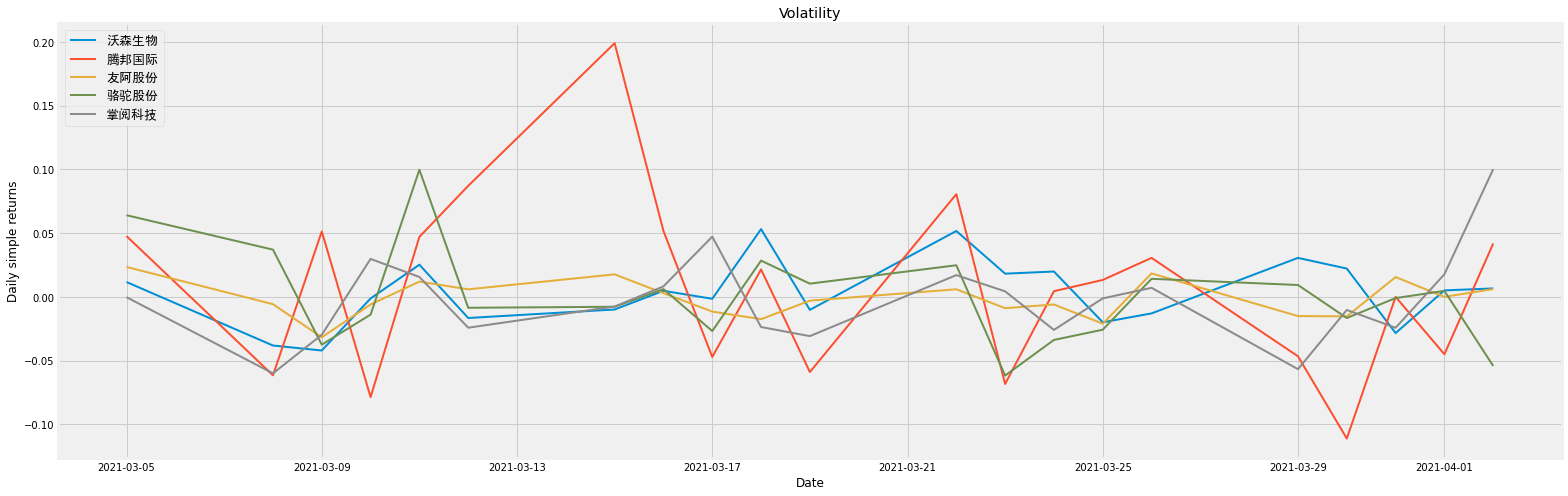

In [115]:
#Visualize the stocks daily simple returns
plt.figure(figsize=(24,8))

#Loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c],lw=2,label=c)

#Create a leagen
plt.legend(stockSymbols.keys(), loc='upper left',prop=fontprop)
plt.title('Volatility')
plt.ylabel('Daily simple returns')
plt.xlabel('Date')
plt.show()

In [116]:
#Show the mean of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean()
print("the daily Mean Simple returns")
print(dailyMeanSimpleReturns)

the daily Mean Simple returns
Symbols
300142.SZ    0.003242
300178.SZ    0.007559
002277.SZ   -0.001605
601311.SS    0.000528
603533.SS   -0.002254
dtype: float64


In [117]:
#Calculate the expected portfolio daily return
randomWeights = np.array([0.4, 0.1,0.3,0.1,0.1]) # 40% FB, 10% AMZN, 30%APPL, 10%NFLX, 10% GOOG


portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

#Print the expeted portfolio return
print('the daily expeted portfolio returns:' + str(portfolioSimpleReturn))



the daily expeted portfolio returns:0.001398523267064057


In [118]:
#Get the yearly returns
# 253 trading days
print('Expected annualised portolio simple returns:' + str(portfolioSimpleReturn * 253))

Expected annualised portolio simple returns:0.35382638656720644


In [119]:
#Calculate the growth of the investment

dailyCumulSimplReturn = (daily_simple_returns + 1).cumprod()

#Show the cumulative simple returns
dailyCumulSimplReturn

Symbols,300142.SZ,300178.SZ,002277.SZ,601311.SS,603533.SS
Date,,,,,
2021-03-04,NaN,NaN,NaN,NaN,NaN
2021-03-05,1.011628,1.047619,1.023460,1.064039,0.999729
2021-03-08,0.973023,0.983193,1.017595,1.103448,0.939756
2021-03-09,0.932093,1.033613,0.985337,1.062069,0.911805
2021-03-10,0.930930,0.952381,0.979472,1.047291,0.938942
2021-03-11,0.954419,0.997199,0.991202,1.151724,0.953596
2021-03-12,0.938605,1.084034,0.997067,1.141872,0.930529
2021-03-15,0.929302,1.299720,1.014663,1.133005,0.923474
2021-03-16,0.933721,1.366947,1.017595,1.139901,0.931072


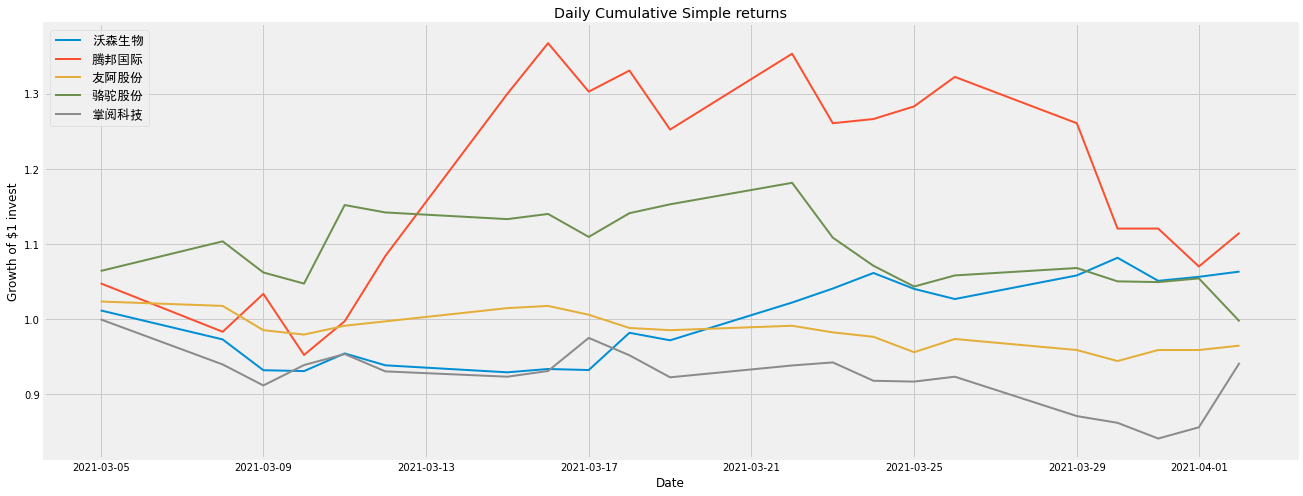

In [123]:
#Visualize the daily cumulative simple returns

plt.figure(figsize=(20, 8))
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, dailyCumulSimplReturn[c],lw=2,label=c)

plt.legend(stockSymbols.keys(), loc='upper left',prop=fontprop)
plt.xlabel('Date')
plt.ylabel('Growth of $1 invest')
plt.title('Daily Cumulative Simple returns')
plt.show()